In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

from diff_music.binary_diffusion import BinaryDiffusion

diff_params = BinaryDiffusion.Params(
    total_steps=100,
    loss_final='weighted',
    use_softmax=True,
    beta_type='linear',
    p_flip=False,
    aux=0,
    use_label=False,
    guidance=0.0,
    channels=1,
    focal_alpha=0.5,
    focal_gamma=0,
    gamma=0.072,
)
diff = BinaryDiffusion(diff_params, None)

Noise scheduler with linear:
Diffusion 1.0 -> 0.5:
1.0000 0.9907 0.9814 0.9722 0.9629 0.9536 0.9443 0.9350 0.9258 0.9165 0.9072 0.8979 0.8886 0.8794 0.8701 0.8608 0.8515 0.8422 0.8330 0.8237 0.8144 0.8051 0.7958 0.7866 0.7773 0.7680 0.7587 0.7494 0.7402 0.7309 0.7216 0.7123 0.7030 0.6938 0.6845 0.6752 0.6659 0.6566 0.6474 0.6381 0.6288 0.6195 0.6102 0.6010 0.5917 0.5824 0.5731 0.5638 0.5546 0.5453 0.5360 0.5267 0.5174 0.5082 0.4989 0.4896 0.4803 0.4710 0.4618 0.4525 0.4432 0.4339 0.4246 0.4154 0.4061 0.3968 0.3875 0.3782 0.3690 0.3597 0.3504 0.3411 0.3318 0.3226 0.3133 0.3040 0.2947 0.2854 0.2762 0.2669 0.2576 0.2483 0.2390 0.2298 0.2205 0.2112 0.2019 0.1926 0.1834 0.1741 0.1648 0.1555 0.1462 0.1370 0.1277 0.1184 0.1091 0.0998 0.0906 0.0813 0.0720
Diffusion 0.0 -> 0.5:
0.0000 0.0007 0.0014 0.0022 0.0029 0.0036 0.0043 0.0050 0.0058 0.0065 0.0072 0.0079 0.0086 0.0094 0.0101 0.0108 0.0115 0.0122 0.0130 0.0137 0.0144 0.0151 0.0158 0.0166 0.0173 0.0180 0.0187 0.0194 0.0202 0.0209 0.0216 0.0

Noise scheduler with test:
Diffusion 1.0 -> 0.5:
1.0000 0.9844 0.9688 0.9532 0.9376 0.9220 0.9064 0.8908 0.8752 0.8595 0.8439 0.8283 0.8127 0.7971 0.7815 0.7659 0.7503 0.7347 0.7191 0.7035 0.6879 0.6723 0.6567 0.6411 0.6255 0.6098 0.5942 0.5786 0.5630 0.5474 0.5318 0.5162 0.5006 0.4850 0.4694 0.4538 0.4382 0.4226 0.4070 0.3914 0.3758 0.3601 0.3445 0.3289 0.3133 0.2977 0.2821 0.2665 0.2509 0.2353 0.2197 0.2041 0.1885 0.1729 0.1573 0.1417 0.1260 0.1104 0.0948 0.0792 0.0636 0.0480 0.0340 0.0241 0.0173
Diffusion 0.0 -> 0.5:
0.0000 0.0000 0.0000 0.0001 0.0001 0.0001 0.0001 0.0001 0.0002 0.0002 0.0002 0.0002 0.0002 0.0002 0.0003 0.0003 0.0003 0.0003 0.0003 0.0004 0.0004 0.0004 0.0004 0.0004 0.0004 0.0005 0.0005 0.0005 0.0005 0.0005 0.0006 0.0006 0.0006 0.0006 0.0006 0.0007 0.0007 0.0007 0.0007 0.0007 0.0008 0.0008 0.0008 0.0008 0.0008 0.0008 0.0009 0.0009 0.0009 0.0009 0.0009 0.0010 0.0010 0.0010 0.0010 0.0010 0.0010 0.0011 0.0011 0.0011 0.0011 0.0011 0.0012 0.0012 0.0012
Beta:
0.0000 0.0156

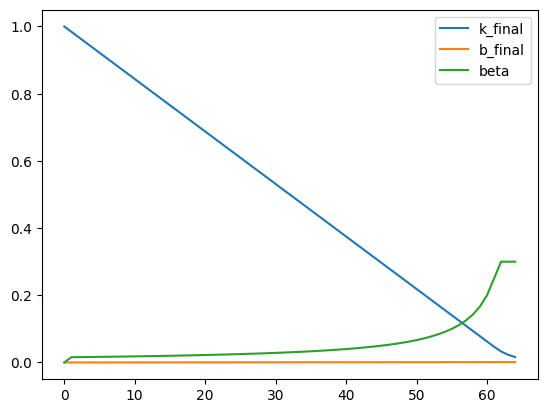

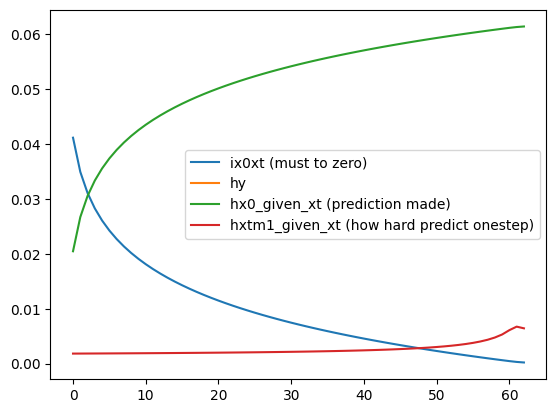

In [ ]:
from diff_music.binary_diffusion import NoiseScheduler
import matplotlib.pyplot as plt
from info_util.numeric import InformationCalculator


test_scheduler = NoiseScheduler(64, 'test', gamma=0.0072)

plt.figure()
plt.plot(test_scheduler.k_final.cpu(), label='k_final')
plt.plot(test_scheduler.b_final.cpu(), label='b_final')
plt.plot(test_scheduler.beta.cpu(), label='beta')
plt.legend()

ixy = []
hy = []
ix0xt = []
hx0_given_xt = []
hxtm1_given_xt = []
for i in range(1,64):
    s = 0.0072
    k = test_scheduler.k_final[i].item()
    b = test_scheduler.b_final[i].item()
    beta = test_scheduler.beta[i].item()
    btm1 = test_scheduler.b_final[i-1].item()
    ktm1 = test_scheduler.k_final[i-1].item()
    gamma = test_scheduler.gamma
    info_calc = InformationCalculator(s*(1-b), s*b, (1-s)*(1-k-b), (1-s)*(k+b))
    
    ix0xt.append(info_calc.i_xy())
    hx0_given_xt.append(info_calc.h_x_given_y())


    pztm1eq1 = ktm1*s+btm1
    pztm1eq0 = 1-pztm1eq1
    pztm1eq1_zteq1 = pztm1eq1*((1-beta)+gamma*beta)
    pztm1eq1_zteq0 = pztm1eq1*(1-((1-beta)+gamma*beta))
    pztm1eq0_zteq1 = pztm1eq0*(gamma*beta)
    pztm1eq0_zteq0 = pztm1eq0*(1-gamma*beta)

    assert abs(pztm1eq0_zteq0+pztm1eq0_zteq1+pztm1eq1_zteq0+pztm1eq1_zteq1 - 1) < 1e-6
    assert abs(pztm1eq0+pztm1eq1 - 1) < 1e-6
    info_calc = InformationCalculator(pztm1eq0_zteq0, pztm1eq0_zteq1, pztm1eq1_zteq0, pztm1eq1_zteq1)
    ixy.append(info_calc.i_xy())
    hxtm1_given_xt.append(info_calc.h_x_given_y())

plt.figure()
# plt.plot(ixy, label='ixtm1xt')
plt.plot(ix0xt, label='ix0xt (must to zero)')
plt.plot(hy, label='hy')
plt.plot(hx0_given_xt, label='hx0_given_xt (prediction made)')
plt.plot(hxtm1_given_xt, label='hxtm1_given_xt (how hard predict onestep)')
plt.legend()


In [119]:
import numpy as np
ix0xT = ix0xt[-1]
hx0 = (-(s)*np.log2(s)-(1-s)*np.log2(1-s))
snr = ix0xT/hx0
print('ix0xT', ix0xT)
print('hx0', hx0)
print('snr', snr)

ix0xT 0.00020369423753036076
hx0 0.06159798868964665
snr 0.0033068326070944836


In [ ]:
ix0xT 1.088300517326779e-05
hx0 0.06159798868964665
snr 0.00017667793063991713

In [86]:
from diff_music.binary_diffusion2 import BinaryDiffusion
import torch

diff_params = BinaryDiffusion.Params(
    total_steps=100,
    loss_final='weighted',
    use_softmax=True,
    beta_type='linear',
    p_flip=False,
    aux=0, 
    use_label=False,
    guidance=0.0,
    channels=1,
    focal_alpha=0.5,
    focal_gamma=0,
    gamma=0.0072,
)

denoise_fn = lambda x, time_steps: x*0.1+ time_steps


diff = BinaryDiffusion(diff_params, denoise_fn)

diff.forward_one_step(torch.rand(1, 1, 100, 100) > 0.5, torch.tensor([1]))

Noise scheduler with linear:
Diffusion 1.0 -> 0.5:
1.0000 0.9901 0.9801 0.9702 0.9603 0.9504 0.9404 0.9305 0.9206 0.9106 0.9007 0.8908 0.8809 0.8709 0.8610 0.8511 0.8412 0.8312 0.8213 0.8114 0.8014 0.7915 0.7816 0.7717 0.7617 0.7518 0.7419 0.7319 0.7220 0.7121 0.7022 0.6922 0.6823 0.6724 0.6624 0.6525 0.6426 0.6327 0.6227 0.6128 0.6029 0.5930 0.5830 0.5731 0.5632 0.5532 0.5433 0.5334 0.5235 0.5135 0.5036 0.4937 0.4837 0.4738 0.4639 0.4540 0.4440 0.4341 0.4242 0.4142 0.4043 0.3944 0.3845 0.3745 0.3646 0.3547 0.3448 0.3348 0.3249 0.3150 0.3050 0.2951 0.2852 0.2753 0.2653 0.2554 0.2455 0.2355 0.2256 0.2157 0.2058 0.1958 0.1859 0.1760 0.1660 0.1561 0.1462 0.1363 0.1263 0.1164 0.1065 0.0966 0.0866 0.0767 0.0668 0.0568 0.0469 0.0370 0.0271 0.0171 0.0072
Diffusion 0.0 -> 0.5:
0.0000 0.0001 0.0001 0.0002 0.0003 0.0004 0.0004 0.0005 0.0006 0.0006 0.0007 0.0008 0.0009 0.0009 0.0010 0.0011 0.0012 0.0012 0.0013 0.0014 0.0014 0.0015 0.0016 0.0017 0.0017 0.0018 0.0019 0.0019 0.0020 0.0021 0.0022 0.0

tensor([[[[0., 0., 0.,  ..., 1., 0., 1.],
          [1., 1., 0.,  ..., 1., 1., 1.],
          [0., 1., 1.,  ..., 0., 0., 1.],
          ...,
          [0., 1., 1.,  ..., 1., 0., 1.],
          [0., 1., 0.,  ..., 0., 1., 1.],
          [0., 1., 0.,  ..., 1., 1., 0.]]]])

tensor([0.6800]) tensor([0.0023])


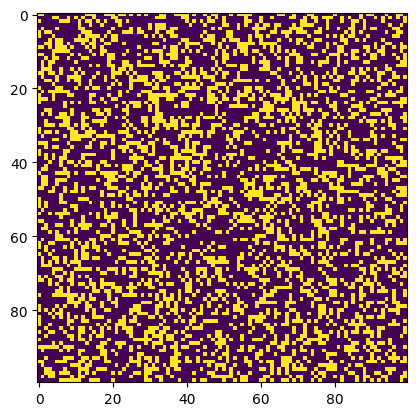

In [77]:
import matplotlib.pyplot as plt

plt.imshow(diff.forward_one_step(torch.rand(1, 1, 100, 100) > 0.5, torch.tensor([32])).cpu()[0,0])


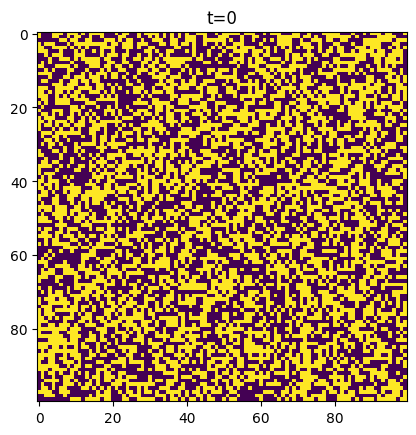

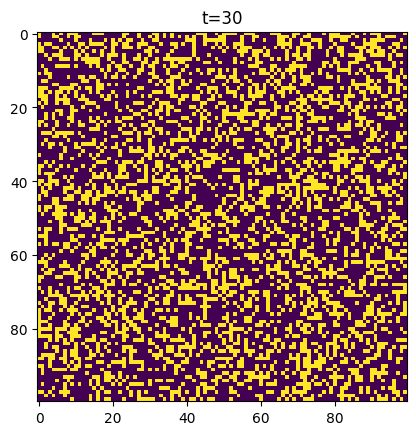

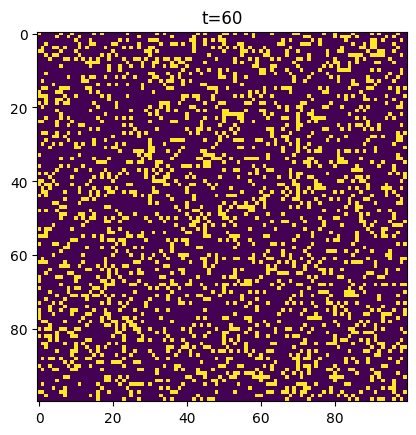

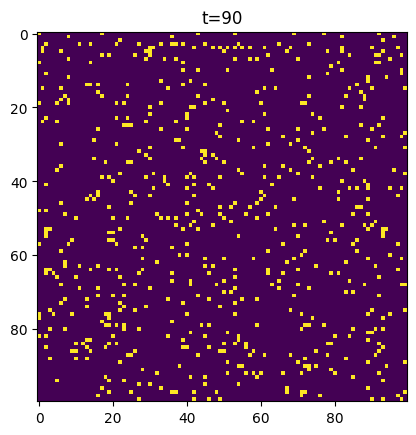

In [81]:
for t, x_t in diff.forward_process(torch.rand(1, 1, 100, 100) > 0.5):
    if t % 30 == 0:
        plt.imshow(x_t.cpu()[0,0], vmin=0, vmax=1)
        plt.title(f't={t}')
        plt.show()


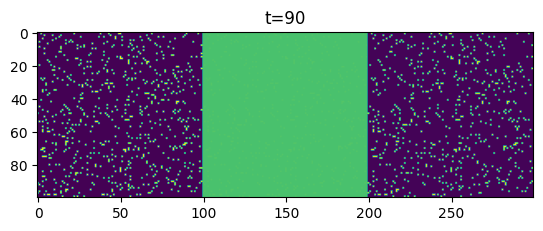

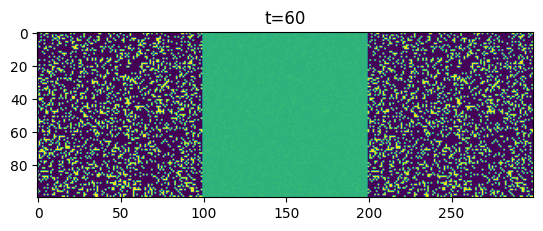

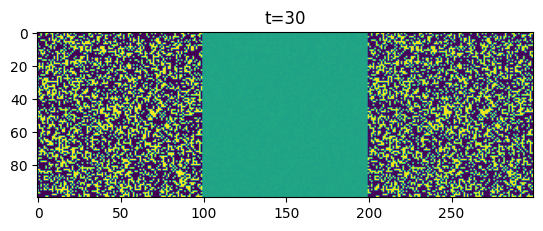

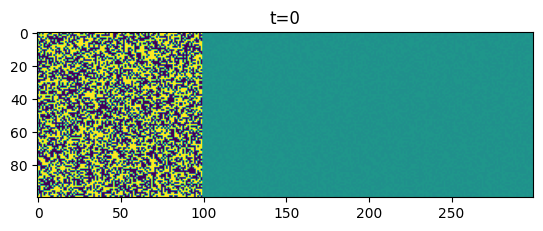

In [88]:
for t, x_t, info in diff.backward_process((torch.rand(1, 1, 100, 100) > 0.9)*1.0):
    if t % 30 == 0:
        plt.imshow(torch.cat([x_t, info['x_0_prob'], info['x_tm1_prob']], dim=-1)[0,0], vmin=0, vmax=1)
        plt.title(f't={t}')
        plt.show()


In [72]:
info['x_0_prob']

tensor([[[[0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
          [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
          [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
          ...,
          [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
          [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000],
          [0.5000, 0.5000, 0.5000,  ..., 0.5000, 0.5000, 0.5000]]]])

In [2]:
import torch
a = torch.tensor([1, 2, 3])
b = a[0]
a *=0
b


tensor(0)